In [4]:
import sympy as sp

In [5]:
x= sp.symbols('x')

In [6]:
# legendtre operator L_()
# to use .args properly t term is used whose effect will be neglected later and no effect on cofficent by t
def L_(f):
    t=x**2 
    return sp.expand(t*((x)*sp.diff(f,x,2) +(1-x)*sp.diff(f,x))) 

In [7]:
P = 4
n = P+1
basis = []
for i in range(n):
    basis.append(x**i)
basis

[1, x, x**2, x**3, x**4]

In [8]:
#check
tp=L_(basis[1])


In [9]:
#check
tp

-x**3 + x**2

In [10]:
# to store terms corresponding to column vector
Ll=[]
t=[]
for i in range(n):
    t.append(L_(basis[i]))
    Ll.append(t)
    t=[]
Ll

[[0],
 [-x**3 + x**2],
 [-2*x**4 + 4*x**3],
 [-3*x**5 + 9*x**4],
 [-4*x**6 + 16*x**5]]

In [11]:
# to convert the Ll terms into required matrix ,L, whose eigenvalues and eigen vectors is to be find
import numpy as np
L = np.zeros([n,n])
L[1][1]=-1
L[1][0]=1# substituting value in 2nd row
L


array([[ 0.,  0.,  0.,  0.,  0.],
       [ 1., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

In [12]:
#check
Ll[2][0].args

(-2*x**4, 4*x**3)

In [13]:
# filling values in L
# also ist row contains 0 only and 2nd row contains -2 only which is replaced already
# all other remaining rows have 2 elements only
for i in range(2,n):
    l1=Ll[i][0].args[0]
    l2=Ll[i][0].args[1]
    
    l1c=float(l1.args[0])
    l2c=float(l2.args[0])
    
    l1_=l1.args[1]
    l2_=l2.args[1]
    
    l1p=int(l1_.args[1])
    l2p=int(l2_.args[1])
    for j in range(2):
        if j==0:
            L[i][l1p-2]=l1c # power is removed by one which is added extra in L_ function
        else:
            L[i][l2p-2]=l2c

L_f = L.T
print(L_f)

[[ 0.  1.  0.  0.  0.]
 [ 0. -1.  4.  0.  0.]
 [ 0.  0. -2.  9.  0.]
 [ 0.  0.  0. -3. 16.]
 [ 0.  0.  0.  0. -4.]]


In [14]:
#get eigen values and corresponding eigen-vectors of L
evalue,evec = np.linalg.eig(L_f)
evec.T

array([[ 1.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [-0.70710678,  0.70710678,  0.        ,  0.        ,  0.        ],
       [ 0.43643578, -0.87287156,  0.21821789,  0.        ,  0.        ],
       [-0.2853909 ,  0.85617269, -0.42808634,  0.04756515,  0.        ],
       [ 0.19445473, -0.77781894,  0.5833642 , -0.12963649,  0.00810228]])

In [15]:
basis

[1, x, x**2, x**3, x**4]

In [16]:
# .dot() do dot product of two vectors(evec.T[i] and basis)
# to get evec as function of polynomial 
# like reversing the process back to Ll matrix but this time with eigenvector coefficient
eigenfn =[]
for i in range(n):
    W = evec.T[i].dot(basis)
    eigenfn.append(W)
eigenfn

[1.00000000000000,
 0.707106781186547*x - 0.707106781186547,
 0.218217890235992*x**2 - 0.87287156094397*x + 0.436435780471985,
 0.0475651494154494*x**3 - 0.428086344739045*x**2 + 0.856172689478089*x - 0.285390896492696,
 0.00810228058630038*x**4 - 0.129636489380806*x**3 + 0.583364202213627*x**2 - 0.777818936284836*x + 0.194454734071209]

Text(0.5, 1.0, 'Legendre :: Linear Transformation')

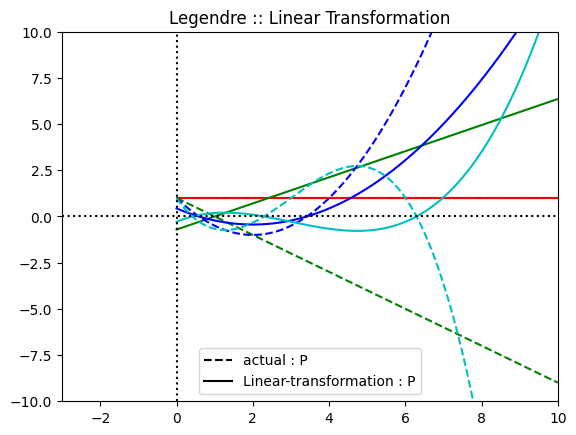

In [29]:
#plot
import matplotlib.pyplot as plt
from scipy.special import laguerre

#color list in order to make sure that legendre actual-P and P has same color
clr=['r','g','b','c','m','k','y','w']

factor=0.01
t1= list(np.arange(0,10,factor))

Efinal = []

#plot is upto degree of basis
pv=4
assert pv<=n

for i in range(pv):
    EF = []
    for j in t1:
#         p = eigenfn[i].subs({x:float(j)})               #converts the variable x in eigenfn to j
#         EF.append(p)
            #or
          q = sp.lambdify(x,eigenfn[i])
          p = q(float(j))
          EF.append(p)
    Efinal.append(EF)
    
    leg=laguerre(i)
    plt.plot(t1,leg(t1),ls="--",c=clr[i])
    plt.plot(t1,Efinal[i],c=clr[i])
        
plt.xlim([-3,10])
plt.ylim([-10,10])

plt.plot(0,label='actual : P',c='k',ls='--')
plt.plot(0,label='Linear-transformation : P',c='k')
plt.legend(loc='best')
plt.axvline(x=0,c='k',ls=':')
plt.axhline(y=0,c='k',ls=':')
plt.title("Legendre :: Linear Transformation")

# print(Efinal)
# plt.yticks(np.arange(-1,1,0.1))
# plt.xticks(np.arange(-1,1,0.1))

the difference between actual-P and P always remains and cannot be removed by variable factor

In [48]:
##check
# from scipy.special import legendre
# l=legendre(2)
# #t=np.linspace(-1,1,100)
# t= list(np.arange(-1,1,accuracy))

# plt.plot(t,l(t))

In [24]:
##check
# EF=[]
# t1= list(np.arange(-1,1,0.1))
# for j in t1:
#     q = sp.lambdify(x,eigenfn[2])
#     p=q(float(j))#converts the variable x in eigenfn to j
#     EF.append(p)
# EF